<a href="https://colab.research.google.com/github/christianadriano/PCA_AquacultureSystem/blob/master/PCA_KMeans_EconomicEnvironment_All.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #tables for data wrangling
import numpy as np #basic statistical methods 
import io #for uploading data

#Manual option
from google.colab import files
uploaded1 = files.upload() #choose file dados_relativizados_carcinicultura.csv



Saving dados_relativizados_centralizados_carcinicultura.csv to dados_relativizados_centralizados_carcinicultura.csv


In [3]:
#Upload data from cvs file
df1 = pd.read_csv(io.StringIO(uploaded1['dados_relativizados_centralizados_carcinicultura.csv'].decode('utf-8'))) 
print(df1)

    Unnamed: 0         cultura  ...    S19_IR    S20_IE
0            0  Carcinicultura  ... -0.015126 -0.181345
1            1  Carcinicultura  ... -3.007332  1.033912
2            2  Carcinicultura  ...  0.028468 -1.738392
3            3  Carcinicultura  ...  0.168525 -0.540663
4            4  Carcinicultura  ...  0.038207 -0.549427
5            5  Carcinicultura  ...  0.245973 -0.540663
6            6  Carcinicultura  ...  0.068815  1.393230
7            7  Carcinicultura  ... -0.217791 -0.937959
8            8  Carcinicultura  ... -0.385673 -1.043125
9            9  Carcinicultura  ... -0.217791  1.895692
10          10  Carcinicultura  ...  1.097908  0.402913
11          11  Carcinicultura  ...  1.097908  0.402913
12          12  Carcinicultura  ...  1.097908  0.402913

[13 rows x 50 columns]


In [7]:
column_names = df1.columns
#Select fatores Economicos e Ambientais 
feature_names = [name for name in column_names if( name.startswith("E") | name.startswith("A")) ] 

#feature_names = list(df.columns["E1_RRLII":"E13_DM"])
#print(feature_names)
list_names = ['cultivo'] + feature_names
df_cultivo_1 = df1[list_names]
df_cultivo_1.head()



,cultivo,E1_RRLII,E2_TIR,E3_PRC,E4_RBC,E5_VPL,E6_LL,E9_R,E10_PPA,E11_TR,E12_DP,E13_DM,A2_DA,A3_UE,A5_UN,A6_UF,A7_EUE,A8_EUN,A9_EUF,A11_PEPN,A12_PPO,A19_AF,A20_AMO,A22_REC,A1_PRC,A2_PRN,A3_PRF,A4_EUC
0,M. rosenbergii - Espirito Santo-,-0.942112,-0.839782,-0.747442,-0.884302,-0.254734,-0.273158,-0.673110,-0.397504,0.006537,-0.508001,-1.425162,-0.758457,-0.486930,-0.925341,1.523464,3.361357,-0.981900,1.548494,0.288406,0.899046,0.005799,-0.035433,0.288675,5.970000e-10,1.760000e-10,1.450000e-10,-3.354904
1,P. vannamei - Sergipe - Semi intensivo,2.444167,2.196693,1.370910,2.539184,1.943953,2.340385,2.166584,-1.043447,-0.852734,1.143001,-1.425162,-0.508045,-0.485603,0.273754,-0.409546,0.339940,2.538890,2.031101,0.435067,1.625857,-0.064077,-0.079352,-3.464102,-3.005706e+00,-2.281014e+00,-1.695427e+00,0.990997
2,L. vannamei - Aquafort,-0.777345,-0.422557,-0.268325,-0.540195,-0.417138,-0.354454,-0.772770,1.281949,-0.852734,2.794003,1.221568,-0.494140,-0.486010,0.762122,-0.225905,-0.495083,0.292514,0.809588,-0.734712,-0.413912,-0.428646,-0.618300,0.288675,1.204142e-01,8.797816e-01,6.545044e-01,0.322879
3,L. vannamei - Northern,-0.738076,-0.589447,-0.489040,-0.536485,-0.363371,-0.321661,-0.674301,-0.009938,-0.852734,-0.508001,-0.101797,-0.464100,-0.486159,0.126027,-0.435625,-0.683614,-0.870315,-0.245603,-0.888383,-1.370484,-0.094458,0.533875,0.288675,1.336618e+00,-1.179946e-01,1.825333e+00,0.071943
4,L. vannamei - Aquacrusta,-0.213248,0.235732,0.395775,0.001547,-0.193271,-0.114267,-0.492830,2.573836,-0.852734,1.143001,0.559885,-0.274286,-0.485371,0.659405,-0.751543,-0.169375,-1.310781,-0.747296,1.795601,-0.167502,3.080332,0.471207,0.288675,5.632915e-01,1.674473e+00,7.846607e-01,0.037439


In [8]:
#Load data from Piscultura
from google.colab import files
uploaded2 = files.upload() #choose file dados_relativizados_centralizados_piscicultura.csv

Saving dados_relativizados_centralizados_piscicultura.csv to dados_relativizados_centralizados_piscicultura.csv


In [9]:
#Upload data from cvs file
df2 = pd.read_csv(io.StringIO(uploaded2['dados_relativizados_centralizados_piscicultura.csv'].decode('utf-8'))) 
#print(df2)

column_names = df2.columns
#Select fatores Economicos e Ambientais
feature_names = [name for name in column_names if( name.startswith("E") | name.startswith("A")) ] 

list_names = ['cultivo'] + feature_names
df_cultivo_2 = df2[list_names]
df_cultivo_2.head()


,cultivo,E1_RRLII,E2_TIR,E3_PRC,E4_RBC,E5_VPL,E6_LL,E9_R,E11_TR,E12_DP,E13_DM,A2_DA,A3_UE,A5_UN,A6_UF,A7_EUE,A8_EUN,A9_EUF,A12_PPO,A22_REC,A4_EUC
0,Truta - race-way,-1.134560e+00,-0.428406,-2.978358e-01,-0.391204,2.482510,1.882159,2.240299,-0.241144,-0.586170,-0.378131,3.122172e+00,-0.557896,-0.561669,-0.197903,0.483326,1.267756,-0.227593,-1.335571e+00,-0.756929,-1.015822e+00
1,Tilapia - gaiolas - SP - sem restricao alimentar,-1.440000e-10,1.478049,-1.091457e+00,-0.522448,-0.203192,0.176072,-0.467980,-1.027255,-1.148893,0.478015,1.410000e-10,1.955370,1.146380,-0.310220,1.961236,1.383958,2.095118,-9.420000e-11,-0.756929,1.597613e+00
2,Tilapia - gaiolas - SP - com restricao alimentar,-1.440000e-10,1.546053,-1.097292e+00,-0.521346,-0.213414,0.155705,-0.466584,-1.027255,-1.148893,0.478015,1.410000e-10,2.316823,1.284580,-0.285437,2.219217,1.498797,2.158006,-9.420000e-11,-0.756929,2.078678e+00
3,Tilapia - gaiola - RS,-1.147545e+00,-1.239764,-1.730000e-10,-0.006560,-0.749713,-0.956475,-0.883276,-1.034842,-1.148893,-1.234277,3.775720e-01,-0.288911,2.504503,3.256382,-0.439364,-0.555705,0.129240,-9.420000e-11,-0.756929,3.150000e-16
4,Tambatinga - viveiro 2,7.012903e-01,-0.557709,-2.687953e-02,-0.507695,-0.465227,-0.461497,-0.649025,-0.733232,1.852298,-0.977433,-7.745291e-03,-0.547845,-0.551644,-0.334452,-0.696611,-1.312654,-0.710166,2.676561e+00,-0.621360,3.150000e-16


In [10]:
#Merge only rows that have the same column names
df_cultivo = pd.concat([df_cultivo_1, df_cultivo_2], axis=0, join="inner",ignore_index=True)
print(df_cultivo.columns)
#combined_df.dropna(axis=1)
#print(combined_df["S7_PA"])
df_cultivo

Index(['cultivo', 'E1_RRLII', 'E2_TIR', 'E3_PRC', 'E4_RBC', 'E5_VPL', 'E6_LL',
       'E9_R', 'E11_TR', 'E12_DP', 'E13_DM', 'A2_DA', 'A3_UE', 'A5_UN',
       'A6_UF', 'A7_EUE', 'A8_EUN', 'A9_EUF', 'A12_PPO', 'A22_REC', 'A4_EUC'],
      dtype='object')


,cultivo,E1_RRLII,E2_TIR,E3_PRC,E4_RBC,E5_VPL,E6_LL,E9_R,E11_TR,E12_DP,E13_DM,A2_DA,A3_UE,A5_UN,A6_UF,A7_EUE,A8_EUN,A9_EUF,A12_PPO,A22_REC,A4_EUC
0,M. rosenbergii - Espirito Santo-,-9.421124e-01,-0.839782,-7.474422e-01,-0.884302,-0.254734,-0.273158,-0.673110,0.006537,-0.508001,-1.425162,-7.584569e-01,-0.486930,-0.925341,1.523464,3.361357,-0.981900,1.548494,8.990461e-01,0.288675,-3.354904e+00
1,P. vannamei - Sergipe - Semi intensivo,2.444167e+00,2.196693,1.370910e+00,2.539184,1.943953,2.340385,2.166584,-0.852734,1.143001,-1.425162,-5.080451e-01,-0.485603,0.273754,-0.409546,0.339940,2.538890,2.031101,1.625857e+00,-3.464102,9.909967e-01
2,L. vannamei - Aquafort,-7.773447e-01,-0.422557,-2.683253e-01,-0.540195,-0.417138,-0.354454,-0.772770,-0.852734,2.794003,1.221568,-4.941398e-01,-0.486010,0.762122,-0.225905,-0.495083,0.292514,0.809588,-4.139118e-01,0.288675,3.228792e-01
3,L. vannamei - Northern,-7.380758e-01,-0.589447,-4.890398e-01,-0.536485,-0.363371,-0.321661,-0.674301,-0.852734,-0.508001,-0.101797,-4.640998e-01,-0.486159,0.126027,-0.435625,-0.683614,-0.870315,-0.245603,-1.370484e+00,0.288675,7.194307e-02
4,L. vannamei - Aquacrusta,-2.132482e-01,0.235732,3.957753e-01,0.001547,-0.193271,-0.114267,-0.492830,-0.852734,1.143001,0.559885,-2.742864e-01,-0.485371,0.659405,-0.751543,-0.169375,-1.310781,-0.747296,-1.675020e-01,0.288675,3.743935e-02
5,L. vannamei - HM,-6.444780e-01,-0.237123,-3.916928e-02,-0.406615,-0.345656,-0.318067,-0.683791,-0.852734,-0.508001,-0.101797,-2.693047e-01,-0.485612,0.638636,-0.633485,-0.277006,0.809328,0.365154,-1.280953e+00,0.288675,2.444617e-01
6,L. vannamei - Ilha,-4.040872e-01,-0.160632,-2.353275e-02,-0.202534,-0.141145,-0.173637,-0.396229,-0.852734,-0.508001,-0.101797,4.688350e-03,-0.485826,-0.089000,-0.662892,-0.402224,1.011942,0.130667,-8.975311e-01,0.288675,4.483473e-01
7,L. vannamei - Carpixe,6.709916e-01,1.033097,1.345956e+00,0.832714,0.555129,0.371374,0.473129,0.006537,-0.508001,-0.101797,1.014354e+00,-0.485467,0.277971,-0.722049,-0.198217,0.251404,-0.515536,-1.013961e-01,0.288675,5.312286e-02
8,L. vannamei - Marinus,1.812227e-01,0.309906,4.577542e-01,0.354051,0.285740,0.193778,0.146945,0.006537,-0.508001,-1.425162,1.348885e+00,-0.485625,1.550973,-0.517750,-0.279820,0.357116,0.457858,-1.181226e-01,0.288675,5.173547e-01
9,L. vannamei - Aquabrasilis,1.228449e+00,1.496681,1.799179e+00,1.393010,1.957549,1.556249,2.236084,0.006537,-0.508001,-0.763480,2.648823e+00,-0.485523,-0.199183,-0.930004,0.002273,-0.315328,-0.136539,2.129743e+00,0.288675,1.629074e-01


In [11]:
#Look at correlations 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_cultivo.corr()

# using a styled panda's dataframe from https://stackoverflow.com/a/42323184/1215012
cmap = 'coolwarm'

def magnify():
    return [dict(selector="th", props=[("font-size", "7pt")]),
            dict(selector="td", props=[('padding', "0em 0em")]),
            dict(selector="th:hover", props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover", 
                 props=[('max-width', '200px'), ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,E1_RRLII,E2_TIR,E3_PRC,E4_RBC,E5_VPL,E6_LL,E9_R,E11_TR,E12_DP,E13_DM,A2_DA,A3_UE,A5_UN,A6_UF,A7_EUE,A8_EUN,A9_EUF,A12_PPO,A22_REC,A4_EUC
E1_RRLII,1.00,0.64,0.20,0.29,0.56,0.65,0.34,0.02,0.07,-0.09,-0.03,-0.20,0.06,-0.22,-0.05,0.36,0.13,0.57,-0.04,0.16
E2_TIR,0.64,1.00,0.10,0.22,0.59,0.69,0.31,-0.17,-0.03,0.08,0.26,0.07,0.30,-0.41,0.31,0.63,0.58,0.36,-0.30,0.42
E3_PRC,0.20,0.10,1.00,0.89,0.27,0.17,0.59,-0.32,0.29,-0.62,0.30,-0.59,0.06,-0.42,-0.30,-0.10,-0.09,0.12,-0.25,0.02
E4_RBC,0.29,0.22,0.89,1.00,0.31,0.26,0.67,-0.31,0.23,-0.59,0.21,-0.36,0.10,-0.28,-0.18,0.04,0.08,0.17,-0.54,0.20
E5_VPL,0.56,0.59,0.27,0.31,1.00,0.97,0.72,-0.20,-0.04,-0.29,0.61,-0.41,0.11,-0.28,0.15,0.52,0.27,0.26,-0.20,-0.06
E6_LL,0.65,0.69,0.17,0.26,0.97,1.00,0.64,-0.21,-0.02,-0.21,0.46,-0.32,0.15,-0.28,0.21,0.60,0.38,0.31,-0.23,0.01
E9_R,0.34,0.31,0.59,0.67,0.72,0.64,1.00,-0.08,0.10,-0.42,0.58,-0.23,-0.15,-0.31,-0.01,0.29,0.06,0.14,-0.40,0.02
E11_TR,0.02,-0.17,-0.32,-0.31,-0.20,-0.21,-0.08,1.00,-0.05,0.58,-0.19,0.28,-0.57,0.23,-0.25,-0.25,-0.55,0.04,0.37,-0.32
E12_DP,0.07,-0.03,0.29,0.23,-0.04,-0.02,0.10,-0.05,1.00,0.07,-0.23,-0.34,-0.14,-0.26,-0.34,-0.22,-0.09,0.18,-0.18,-0.01
E13_DM,-0.09,0.08,-0.62,-0.59,-0.29,-0.21,-0.42,0.58,0.07,1.00,-0.30,0.49,-0.23,0.03,-0.17,0.00,-0.26,-0.23,0.36,0.16


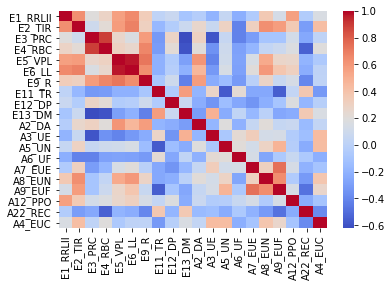

In [12]:
#smaller chart
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')

In [13]:
#check which ones are statiscally significant
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

p_values = calculate_pvalues(df_cultivo)


In [14]:
#Plot p-values
def highlight_significant(val):
    '''
    highlight in blue only the statistically significant cells
    '''
    color = 'blue' if val < 0.05 else 'grey'
    return 'color: %s' % color

p_values.style.applymap(highlight_significant)

,E1_RRLII,E2_TIR,E3_PRC,E4_RBC,E5_VPL,E6_LL,E9_R,E11_TR,E12_DP,E13_DM,A2_DA,A3_UE,A5_UN,A6_UF,A7_EUE,A8_EUN,A9_EUF,A12_PPO,A22_REC,A4_EUC
E1_RRLII,0.000000,0.000600,0.346900,0.166800,0.003300,0.000400,0.095800,0.917700,0.731600,0.663300,0.879500,0.350000,0.791800,0.293400,0.812500,0.072800,0.527600,0.003000,0.843700,0.435200
E2_TIR,0.000600,0.000000,0.645800,0.284800,0.002100,0.000100,0.127500,0.425500,0.874400,0.709800,0.206100,0.746400,0.147200,0.039600,0.129600,0.000700,0.002300,0.078000,0.145100,0.034400
E3_PRC,0.346900,0.645800,0.000000,0.000000,0.193700,0.422700,0.002000,0.120200,0.166600,0.000900,0.140600,0.001900,0.778700,0.037500,0.141100,0.651000,0.666700,0.552100,0.226800,0.929900
E4_RBC,0.166800,0.284800,0.000000,0.000000,0.137600,0.211200,0.000300,0.132600,0.275500,0.001900,0.318800,0.081400,0.643400,0.170300,0.378300,0.840700,0.687600,0.413200,0.004900,0.335200
E5_VPL,0.003300,0.002100,0.193700,0.137600,0.000000,0.000000,0.000000,0.326500,0.841800,0.164500,0.001100,0.043500,0.600000,0.176300,0.476000,0.007700,0.183600,0.202800,0.346600,0.775000
E6_LL,0.000400,0.000100,0.422700,0.211200,0.000000,0.000000,0.000500,0.320100,0.921500,0.317200,0.019900,0.117200,0.482200,0.171500,0.318400,0.001700,0.060700,0.128100,0.277100,0.946400
E9_R,0.095800,0.127500,0.002000,0.000300,0.000000,0.000500,0.000000,0.689200,0.648800,0.035400,0.002400,0.266500,0.485500,0.129200,0.972700,0.162600,0.759200,0.491700,0.048900,0.925500
E11_TR,0.917700,0.425500,0.120200,0.132600,0.326500,0.320100,0.689200,0.000000,0.806600,0.002600,0.364300,0.176300,0.003100,0.273200,0.220100,0.225700,0.004000,0.856200,0.066200,0.120400
E12_DP,0.731600,0.874400,0.166600,0.275500,0.841800,0.921500,0.648800,0.806600,0.000000,0.735800,0.276000,0.094600,0.507400,0.209200,0.097300,0.289200,0.659500,0.382100,0.393100,0.944000
E13_DM,0.663300,0.709800,0.000900,0.001900,0.164500,0.317200,0.035400,0.002600,0.735800,0.000000,0.145400,0.013100,0.270200,0.904700,0.425000,0.991600,0.218400,0.267100,0.076100,0.448000


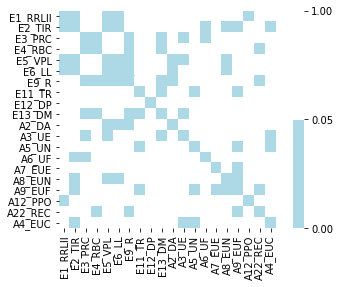

In [15]:
#Smaller plot of p-values
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

np.random.seed(101)
zvals = np.random.rand(100, 100) * 10

# make a color map of fixed colors
cmap_discrete = colors.ListedColormap(['lightblue', 'white'])
bounds=[0,0.05,1]
norm_binary = colors.BoundaryNorm(bounds, cmap_discrete.N)

# tell imshow about color map so that only set colors are used
img = plt.imshow(zvals, interpolation='nearest', origin='lower',
                    cmap=cmap_discrete, norm=norm_binary)

sns.heatmap(p_values, xticklabels=p_values.columns, yticklabels=p_values.columns, cmap=cmap_discrete, norm=norm_binary)

**PCA** 
Now we do the PCA 

In [16]:
#Normalize the data to have MEAN==0
from sklearn.preprocessing import StandardScaler

x = df_cultivo.iloc[:,1:].values
x = StandardScaler().fit_transform(x) # normalizing the features
#print(x)
x.shape


(25, 20)

In [17]:
#Run PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

df_components = pd.DataFrame(data = principalComponents
            , columns = ['principal component 1', 'principal component 2'])

df_components = pd.concat([df_cultivo['cultivo'],df_components], axis = 1)

['M. rosenbergii - Espirito Santo-'
 'P. vannamei - Sergipe - Semi intensivo' 'L. vannamei - Aquafort'
 'L. vannamei - Northern' 'L. vannamei - Aquacrusta' 'L. vannamei - HM'
 'L. vannamei - Ilha' 'L. vannamei - Carpixe' 'L. vannamei - Marinus'
 'L. vannamei - Aquabrasilis' 'L. vannamei - Aquarium - baixa densid.'
 'L. vannamei - Aquarium - alta densis'
 'L. vannamei - Aquarium-  bifasico' 'Truta - race-way'
 'Tilapia - gaiolas - SP -  sem restricao alimentar'
 'Tilapia - gaiolas - SP - com restricao alimentar'
 'Tilapia - gaiola - RS' 'Tambatinga - viveiro 2'
 'Tambatinga - viveiro 23' 'Tambatinga - viveiro 250'
 'Tambaqui - M amazonicum - policultivo - SP' 'Tilapia - tanque rede - RN'
 'Lambari - semi intensivo - baixo controle'
 'Lambari - semi intensivo - médio controle'
 'Lambari - semi intensivo - alto controle']


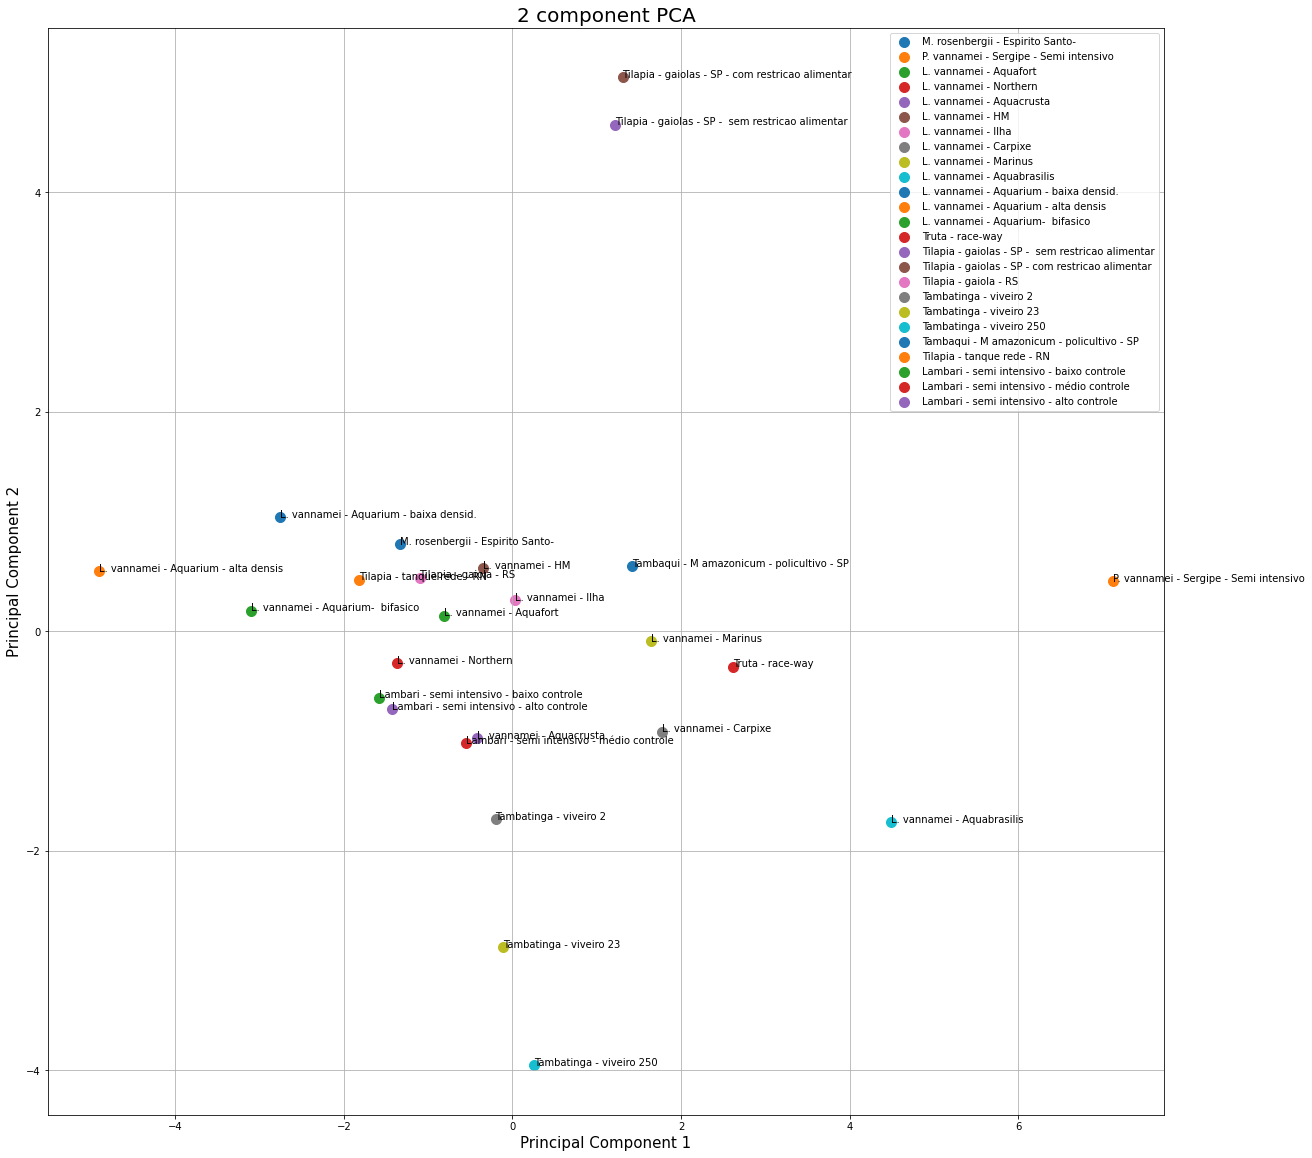

In [19]:
#Visualize results of PCA in Two Dimensions
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = df_cultivo['cultivo'].to_numpy()
print(targets)
for target in targets:
    indicesToKeep = df_components['cultivo'] == target
    x = df_components.loc[indicesToKeep, 'principal component 1']
    y = df_components.loc[indicesToKeep, 'principal component 2']
    ax.scatter(x,y,s = 100)
    ax.annotate(target, (x,y))

#for name in targets:  
    
ax.legend(targets)
ax.grid()

In [20]:
variance_list =pca.explained_variance_ratio_
print("variance explained by each component:", variance_list)
print("total variance explained:", sum(variance_list))


variance explained by each component: [0.28876724 0.1681934 ]
total variance explained: 0.4569606347919187


In [21]:
#principal components for each indicador
#print(principalComponents)
#print(targets)
df_clustering = pd.DataFrame({'cultivo': targets,  'pc1':list(principalComponents[:,0]), 'pc2': list(principalComponents[:,1])}, columns=['cultivo', 'pc1','pc2'])
#df_clustering

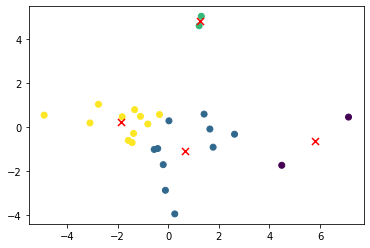

In [22]:
#4 clusters 
from sklearn.cluster import KMeans
model = KMeans(4)
model.fit(df_clustering.iloc[:,1:3])
#print(model.cluster_centers_)

#Plot clusters
plt.scatter(df_clustering.iloc[:,1],df_clustering.iloc[:,2], c=model.labels_.astype(float));
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=50, marker='x', color="red"); # Show the 

In [23]:
#To which cluster each point belongs?
df1= df_clustering.assign(cluster=pd.Series(model.labels_).values)
df1.sort_values(by='cluster')

,cultivo,pc1,pc2,cluster
1,P. vannamei - Sergipe - Semi intensivo,7.129560,0.454863,0
9,L. vannamei - Aquabrasilis,4.487731,-1.741325,0
8,L. vannamei - Marinus,1.644352,-0.089952,1
13,Truta - race-way,2.620044,-0.325630,1
23,Lambari - semi intensivo - médio controle,-0.557513,-1.019292,1
18,Tambatinga - viveiro 23,-0.115306,-2.879920,1
19,Tambatinga - viveiro 250,0.255523,-3.956676,1
17,Tambatinga - viveiro 2,-0.201606,-1.712257,1
6,L. vannamei - Ilha,0.024990,0.284473,1
20,Tambaqui - M amazonicum - policultivo - SP,1.415035,0.589860,1


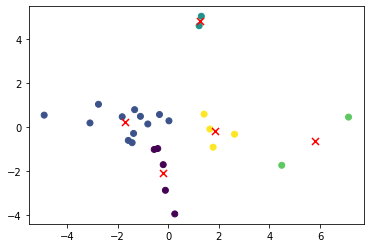

In [24]:
#5 clusters
model = KMeans(5)
model.fit(df_clustering.iloc[:,1:3])
#print(model.cluster_centers_)

#Plot clusters
plt.scatter(df_clustering.iloc[:,1],df_clustering.iloc[:,2], c=model.labels_.astype(float));
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=50,  marker='x', color="red"); # Show the 


In my view, we have two large clusters and three outliers, as the graph above shows.

In [25]:
#To which cluster each point belongs?
df1= df_clustering.assign(cluster=pd.Series(model.labels_).values)
df1.sort_values(by='cluster')

,cultivo,pc1,pc2,cluster
19,Tambatinga - viveiro 250,0.255523,-3.956676,0
4,L. vannamei - Aquacrusta,-0.418787,-0.977582,0
18,Tambatinga - viveiro 23,-0.115306,-2.879920,0
17,Tambatinga - viveiro 2,-0.201606,-1.712257,0
23,Lambari - semi intensivo - médio controle,-0.557513,-1.019292,0
0,M. rosenbergii - Espirito Santo-,-1.332200,0.792897,1
22,Lambari - semi intensivo - baixo controle,-1.582534,-0.607704,1
21,Tilapia - tanque rede - RN,-1.824808,0.469155,1
16,Tilapia - gaiola - RS,-1.102999,0.488557,1
11,L. vannamei - Aquarium - alta densis,-4.911322,0.544087,1


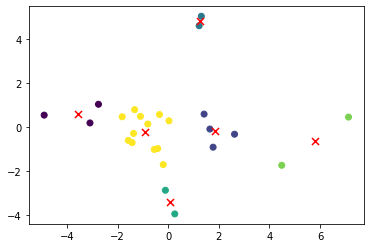

In [26]:
#6 clusters
model = KMeans(6)
model.fit(df_clustering.iloc[:,1:3])
#print(model.cluster_centers_)

#Plot clusters
plt.scatter(df_clustering.iloc[:,1],df_clustering.iloc[:,2], c=model.labels_.astype(float));
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=50, marker='x', color="red"); # Show the 

#7 clusters

In [27]:
#To which cluster each point belongs?
df1= df_clustering.assign(cluster=pd.Series(model.labels_).values)
df1.sort_values(by='cluster')

,cultivo,pc1,pc2,cluster
12,L. vannamei - Aquarium- bifasico,-3.098617,0.187740,0
10,L. vannamei - Aquarium - baixa densid.,-2.763454,1.038822,0
11,L. vannamei - Aquarium - alta densis,-4.911322,0.544087,0
20,Tambaqui - M amazonicum - policultivo - SP,1.415035,0.589860,1
7,L. vannamei - Carpixe,1.772243,-0.916316,1
8,L. vannamei - Marinus,1.644352,-0.089952,1
13,Truta - race-way,2.620044,-0.325630,1
14,Tilapia - gaiolas - SP - sem restricao alimentar,1.219178,4.615879,2
15,Tilapia - gaiolas - SP - com restricao alimentar,1.306305,5.048778,2
19,Tambatinga - viveiro 250,0.255523,-3.956676,3


In [28]:
#To which cluster each point belongs?
df1= df_clustering.assign(cluster=pd.Series(model.labels_).values)
df1.sort_values(by='cluster')

,cultivo,pc1,pc2,cluster
12,L. vannamei - Aquarium- bifasico,-3.098617,0.187740,0
10,L. vannamei - Aquarium - baixa densid.,-2.763454,1.038822,0
11,L. vannamei - Aquarium - alta densis,-4.911322,0.544087,0
20,Tambaqui - M amazonicum - policultivo - SP,1.415035,0.589860,1
7,L. vannamei - Carpixe,1.772243,-0.916316,1
8,L. vannamei - Marinus,1.644352,-0.089952,1
13,Truta - race-way,2.620044,-0.325630,1
14,Tilapia - gaiolas - SP - sem restricao alimentar,1.219178,4.615879,2
15,Tilapia - gaiolas - SP - com restricao alimentar,1.306305,5.048778,2
19,Tambatinga - viveiro 250,0.255523,-3.956676,3


Now we analyze 3 Principal Components



In [29]:
#Normalize the data to have MEAN==0
from sklearn.preprocessing import StandardScaler

x = df_cultivo.iloc[:,1:].values
x = StandardScaler().fit_transform(x) # normalizing the features
#print(x)

In [30]:
#Run PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
finalDf = pd.concat([principalDf, df_cultivo[['cultivo']]], axis = 1)

In [31]:
#principal components for each indicador
#print(principalComponents)
#print(targets)
df_clustering = pd.DataFrame({'cultivo': targets,  'pc1':list(principalComponents[:,0]), 'pc2': list(principalComponents[:,1]),'pc3': list(principalComponents[:,2])}, columns=['cultivo', 'pc1','pc2','pc3'])
#df_clustering

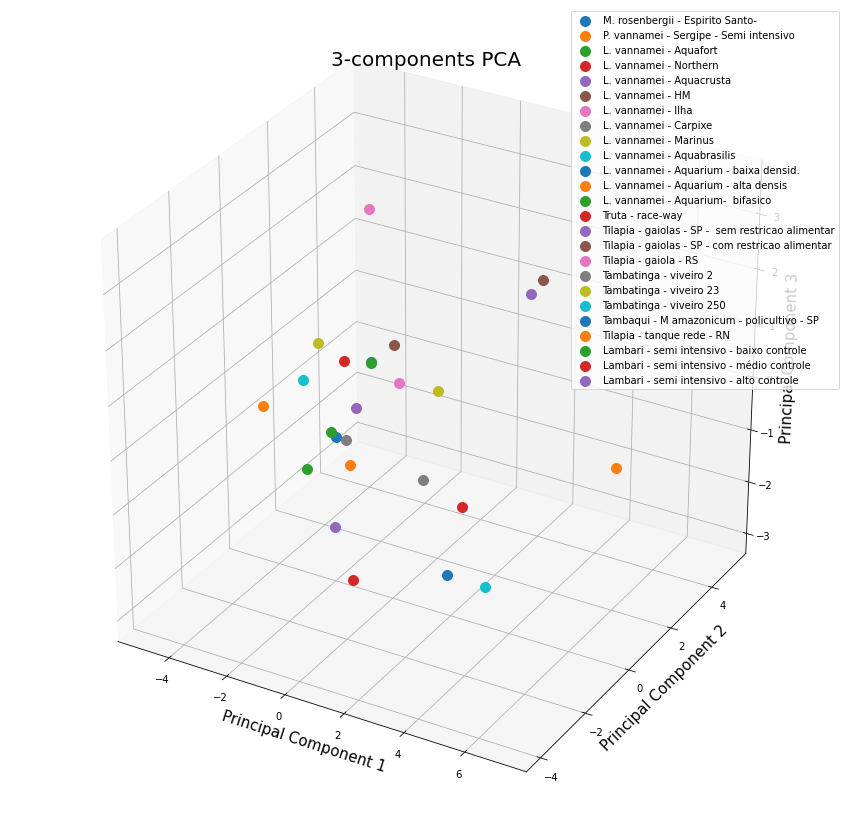

In [33]:
#Visualize results of PCA in Three Dimensions
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3-components PCA', fontsize = 20)
targets = df_cultivo['cultivo'].to_numpy()

for target in targets:
    indicesToKeep = finalDf['cultivo'] == target
    x = finalDf.loc[indicesToKeep, 'principal component 1']
    y = finalDf.loc[indicesToKeep, 'principal component 2']
    z = finalDf.loc[indicesToKeep, 'principal component 3']
    ax.scatter(x,y,z,s = 100)
    
ax.legend(targets)
ax.grid()

In [34]:
variance_list =pca.explained_variance_ratio_
print("variance explained by each component:", variance_list)
print("total variance explained:", sum(variance_list))

variance explained by each component: [0.28876724 0.1681934  0.11875783]
total variance explained: 0.5757184688862264


Now we search for clusters for 3 principal components

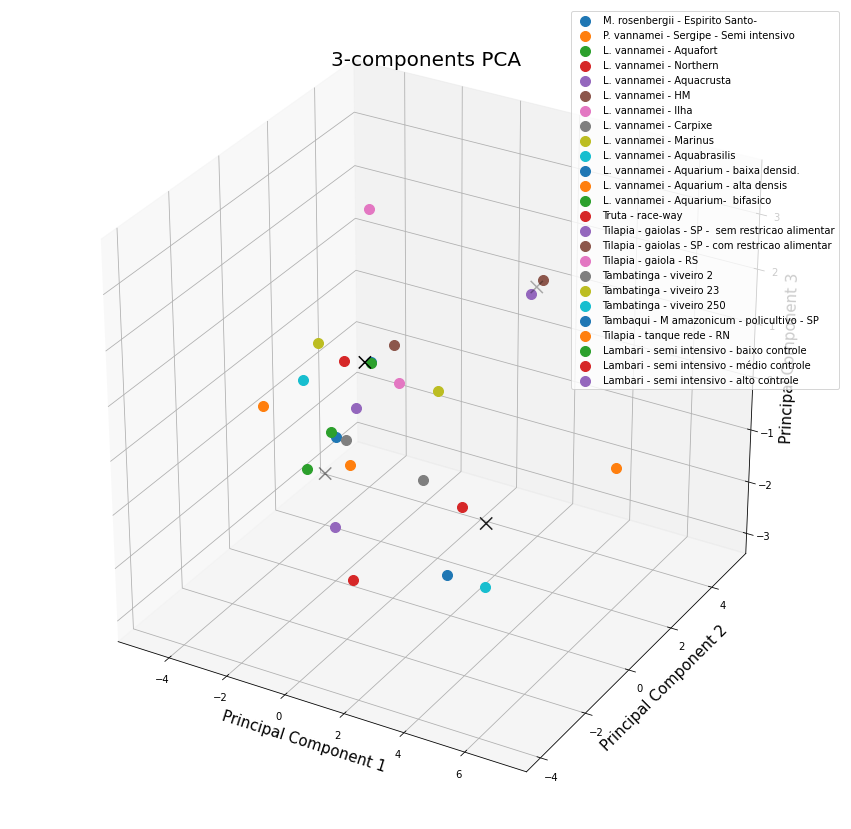

In [35]:
#4 clusters 
from sklearn.cluster import KMeans
model = KMeans(4)
model.fit(df_clustering.iloc[:,1:4])
#print(model.cluster_centers_)

#Plot clusters
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3-components PCA', fontsize = 20)
targets = df_cultivo['cultivo'].to_numpy()

for target in targets:
    indicesToKeep = finalDf['cultivo'] == target
    x = finalDf.loc[indicesToKeep, 'principal component 1']
    y = finalDf.loc[indicesToKeep, 'principal component 2']
    z = finalDf.loc[indicesToKeep, 'principal component 3']
    ax.scatter(x,y,z,s = 100)

ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],model.cluster_centers_[:,2], s=150, marker='x', color="black"); # Show the 
   
ax.legend(targets)
ax.grid()

In [36]:
#principal components for each indicador
#print(principalComponents)
#print(targets)
df_clustering = pd.DataFrame({'cultivo': targets,  'pc1':list(principalComponents[:,0]),
                              'pc2': list(principalComponents[:,1]),'pc3': list(principalComponents[:,2])},
                              columns=['cultivo', 'pc1','pc2','pc3'])
#df_clustering

In [37]:
#To which cluster each point belongs?
df1= df_clustering.assign(cluster=pd.Series(model.labels_).values)
df1.sort_values(by='cluster')


,cultivo,pc1,pc2,pc3,cluster
0,M. rosenbergii - Espirito Santo-,-1.332200,0.792897,0.587603,0
18,Tambatinga - viveiro 23,-0.115306,-2.879920,2.390330,0
19,Tambatinga - viveiro 250,0.255523,-3.956676,2.178475,0
16,Tilapia - gaiola - RS,-1.102999,0.488557,3.500766,0
6,L. vannamei - Ilha,0.024990,0.284473,0.588399,0
8,L. vannamei - Marinus,1.644352,-0.089952,0.819214,0
4,L. vannamei - Aquacrusta,-0.418787,-0.977582,0.502151,0
3,L. vannamei - Northern,-1.374497,-0.289711,0.977487,0
2,L. vannamei - Aquafort,-0.811391,0.140343,0.872868,0
5,L. vannamei - HM,-0.348608,0.571661,1.121415,0


Comparing k-means of PC12 with PC123, we see that the cluster membership changes completely.

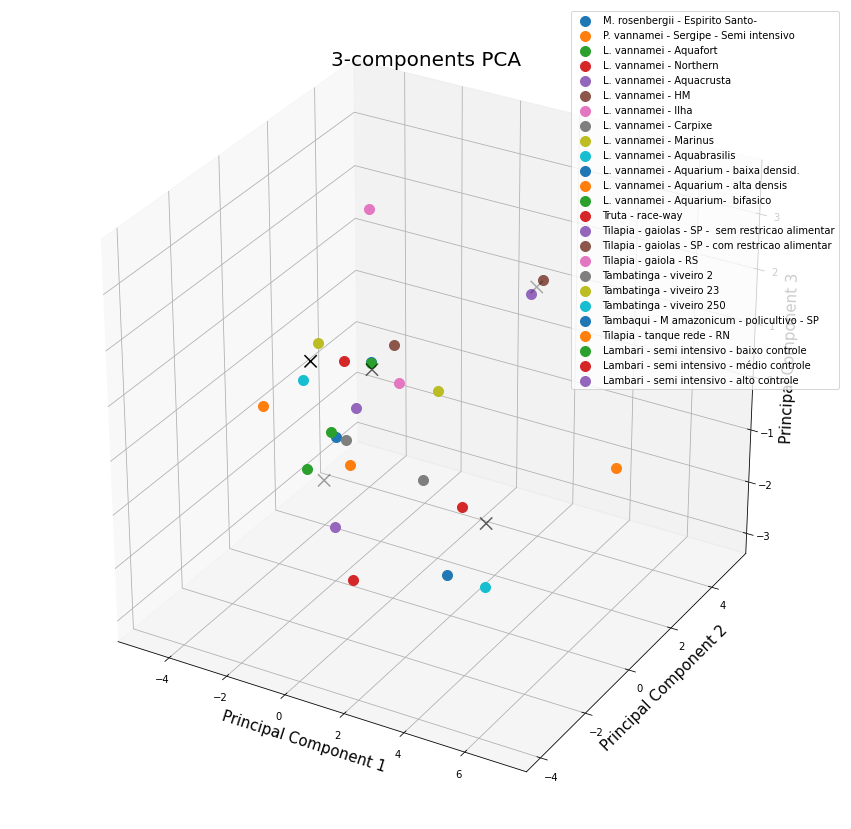

In [38]:
#5 clusters 
from sklearn.cluster import KMeans
model = KMeans(5)
model.fit(df_clustering.iloc[:,1:4])
#print(model.cluster_centers_)

#Plot clusters
#plt.scatter(df_clustering.iloc[:,1],df_clustering.iloc[:,2], c=model.labels_.astype(float));
#plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=50, color="red"); # Show the 

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3-components PCA', fontsize = 20)
targets = df_cultivo['cultivo'].to_numpy()

for target in targets:
    indicesToKeep = finalDf['cultivo'] == target
    x = finalDf.loc[indicesToKeep, 'principal component 1']
    y = finalDf.loc[indicesToKeep, 'principal component 2']
    z = finalDf.loc[indicesToKeep, 'principal component 3']
    ax.scatter(x,y,z,s = 100)
    #ax.annotate(target, (x,y))

ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],model.cluster_centers_[:,2], s=150, marker='x', color="black"); # Show the 

#for name in targets:  
    
ax.legend(targets)
ax.grid()

In [39]:
#To which cluster each point belongs?
df1= df_clustering.assign(cluster=pd.Series(model.labels_).values)
df1.sort_values(by='cluster')

,cultivo,pc1,pc2,pc3,cluster
15,Tilapia - gaiolas - SP - com restricao alimentar,1.306305,5.048778,1.059097,0
14,Tilapia - gaiolas - SP - sem restricao alimentar,1.219178,4.615879,0.920946,0
0,M. rosenbergii - Espirito Santo-,-1.332200,0.792897,0.587603,1
17,Tambatinga - viveiro 2,-0.201606,-1.712257,0.225150,1
2,L. vannamei - Aquafort,-0.811391,0.140343,0.872868,1
3,L. vannamei - Northern,-1.374497,-0.289711,0.977487,1
4,L. vannamei - Aquacrusta,-0.418787,-0.977582,0.502151,1
5,L. vannamei - HM,-0.348608,0.571661,1.121415,1
6,L. vannamei - Ilha,0.024990,0.284473,0.588399,1
16,Tilapia - gaiola - RS,-1.102999,0.488557,3.500766,1


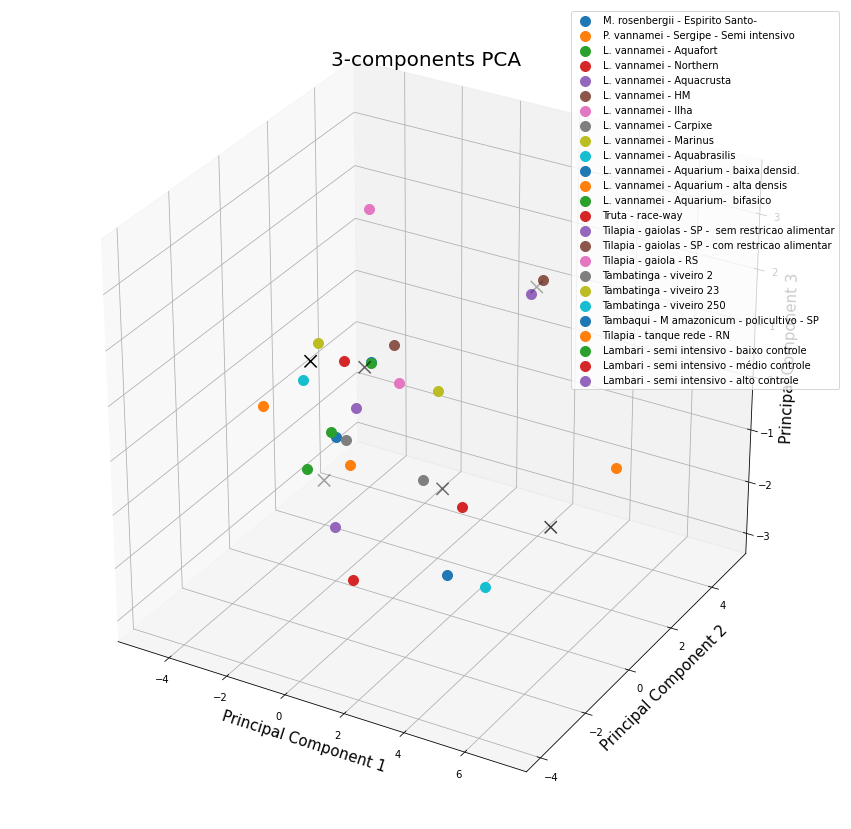

In [40]:
#6 clusters 
from sklearn.cluster import KMeans
model = KMeans(6)
model.fit(df_clustering.iloc[:,1:4])
#print(model.cluster_centers_)

#Plot clusters
#plt.scatter(df_clustering.iloc[:,1],df_clustering.iloc[:,2], c=model.labels_.astype(float));
#plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=50, color="red"); # Show the 

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3-components PCA', fontsize = 20)
targets = df_cultivo['cultivo'].to_numpy()

for target in targets:
    indicesToKeep = finalDf['cultivo'] == target
    x = finalDf.loc[indicesToKeep, 'principal component 1']
    y = finalDf.loc[indicesToKeep, 'principal component 2']
    z = finalDf.loc[indicesToKeep, 'principal component 3']
    ax.scatter(x,y,z,s = 100)

ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],model.cluster_centers_[:,2], s=150, marker='x', color="black"); # Show the 
    
ax.legend(targets)
ax.grid()

In [41]:
#To which cluster each point belongs?
df1= df_clustering.assign(cluster=pd.Series(model.labels_).values)
df1.sort_values(by='cluster')

,cultivo,pc1,pc2,pc3,cluster
0,M. rosenbergii - Espirito Santo-,-1.332200,0.792897,0.587603,0
2,L. vannamei - Aquafort,-0.811391,0.140343,0.872868,0
3,L. vannamei - Northern,-1.374497,-0.289711,0.977487,0
4,L. vannamei - Aquacrusta,-0.418787,-0.977582,0.502151,0
5,L. vannamei - HM,-0.348608,0.571661,1.121415,0
6,L. vannamei - Ilha,0.024990,0.284473,0.588399,0
22,Lambari - semi intensivo - baixo controle,-1.582534,-0.607704,-0.255121,0
17,Tambatinga - viveiro 2,-0.201606,-1.712257,0.225150,0
16,Tilapia - gaiola - RS,-1.102999,0.488557,3.500766,0
1,P. vannamei - Sergipe - Semi intensivo,7.129560,0.454863,0.075735,1
